# Data Preprocessing

In [3]:
import pandas as pd

data = pd.read_csv('TestPad_PCB_XYRGB_V2.csv')
data['Intensity'] = (data['R'] + data['G'] + data['B']) / 3
data['R_G_ratio'] = data['R'] / data['G']
data['R_B_ratio'] = data['R'] / data['B']
data['G_B_ratio'] = data['G'] / data['B']

# Find best number of clusters

## Features = [R, G, B]

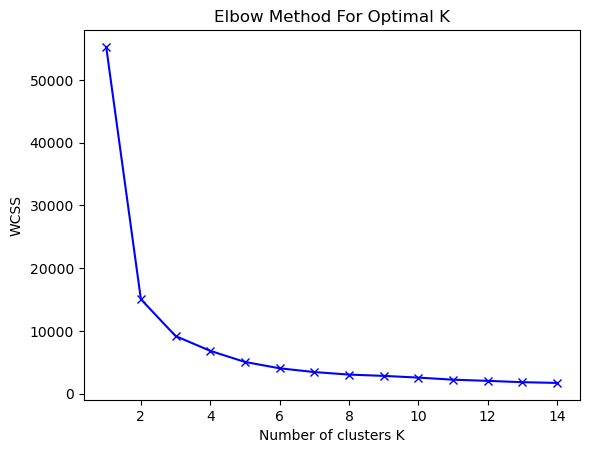

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
K = range(1, 15)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data[["R", "G", "B"]])
    wcss.append(kmeans.inertia_)

plt.plot(K, wcss, 'bx-')
plt.xlabel('Number of clusters K')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal K')
plt.show()


In [8]:
kmeans = KMeans(n_clusters=3, n_init=10)
data['Cluster'] = kmeans.fit_predict(data[["R", "G", "B"]])
ct = pd.crosstab(data['Grey'], data['Cluster'])
print("CrossTab:\n", ct)
print("---")
print(f"Accuracy: {(data['Cluster'] == data['Grey']).sum()/data.shape[0]}")

CrossTab:
 Cluster       0       1       2
Grey                           
0        446370  120284  144995
1             0    2483    9420
---
Accuracy: 0.6203465680421034


## Features = [R, G, B, Intensity]

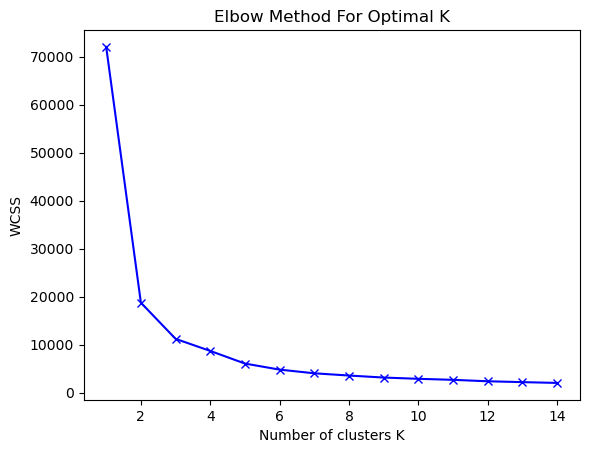

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
K = range(1, 15)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data[["R", "G", "B", "Intensity"]])
    wcss.append(kmeans.inertia_)

plt.plot(K, wcss, 'bx-')
plt.xlabel('Number of clusters K')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal K')
plt.show()


In [13]:
kmeans = KMeans(n_clusters=3, n_init=10)
data['Cluster'] = kmeans.fit_predict(data[["R", "G", "B", "Intensity"]])
ct = pd.crosstab(data['Grey'], data['Cluster'])
print("CrossTab:\n", ct)
print("---")
print(f"Accuracy: {(data['Cluster'] == data['Grey']).sum()/data.shape[0]}")

CrossTab:
 Cluster       0       1       2
Grey                           
0        454965  117706  138978
1             0    1822   10081
---
Accuracy: 0.6313119167661757


## Features = [R, G, B, Intensity, R_G_ratio, G_B_ratio, R_B_ratio]

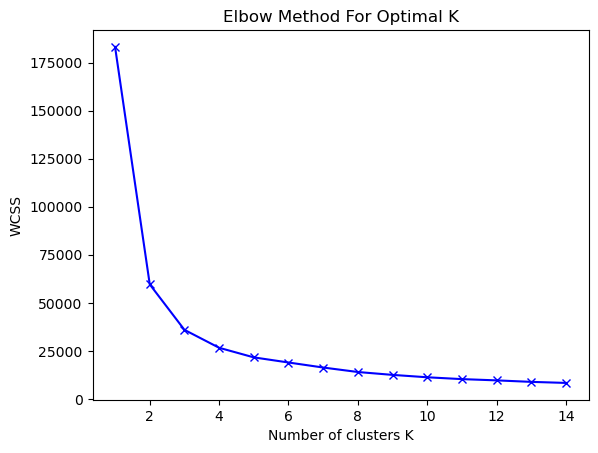

In [14]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
K = range(1, 15)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data[["R", "G", "B", "Intensity", "R_B_ratio", "G_B_ratio", "R_G_ratio"]])
    wcss.append(kmeans.inertia_)

plt.plot(K, wcss, 'bx-')
plt.xlabel('Number of clusters K')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal K')
plt.show()


In [17]:
kmeans = KMeans(n_clusters=3, n_init=10)
data['Cluster'] = kmeans.fit_predict(data[["R", "G", "B", "Intensity", "R_B_ratio", "G_B_ratio", "R_G_ratio"]])
ct = pd.crosstab(data['Grey'], data['Cluster'])
print("CrossTab:\n", ct)
print("---")
print(f"Accuracy: {(data['Cluster'] == data['Grey']).sum()/data.shape[0]}")

CrossTab:
 Cluster       0       1       2
Grey                           
0        368415  140199  203035
1             0   11903       0
---
Accuracy: 0.5256263544292601
